<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Trainining Series on Software Engineering For Data Science  
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

# Notebook 7: Data Processing & Cleaning for Data Science: Exploratory Data Analysis and Visualization– Going Deeper
The purpose of this [Jupyter Notebook] is to getting you go deeper on Data Processing & Cleaning for Data
Science. It provides a set of practical Training challenges that allow grasping the different concepts presented in  lecture 7.

## EDA

### Challenge 1:  iTunes dataset
Using the iTunes dataset existed in the /data folder of this notebook, you are asked to  proceed with the  exploratory data analysis and visulaization techniques seen in lecture 7 to provide a clean dataset as well as to report a small summary of your EDA results to your team.

The EDA should be done using a visualization technique rather than using the basic EDA procedures seen in Lecture 5.
See Test from Slide 4 to 16.

Report the possible high correlation found from your visualization EDA.


c:\Users\houss\Desktop\data-science-labs-7\venv\Lib\site-packages\seaborn\categorical.py:383: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(n - .5, -.5, auto=None)
c:\Users\houss\Desktop\data-science-labs-7\venv\Lib\site-packages\seaborn\categorical.py:383: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(n - .5, -.5, auto=None)


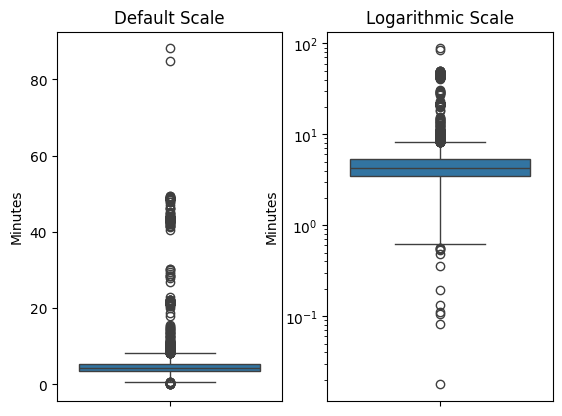

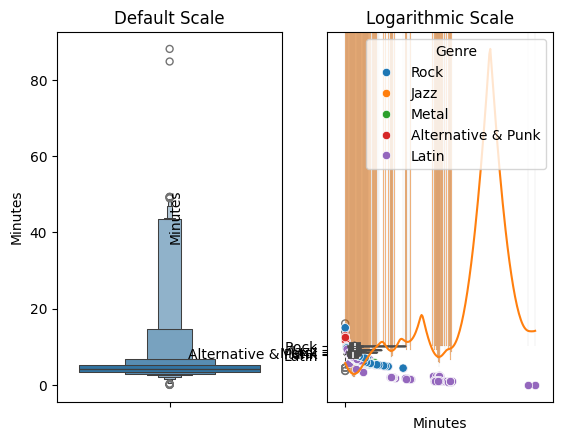

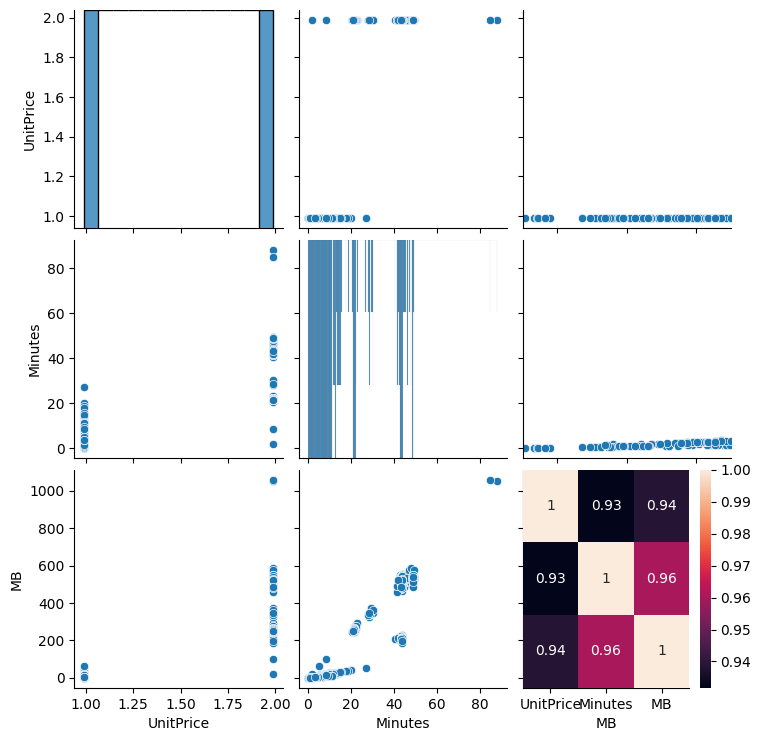

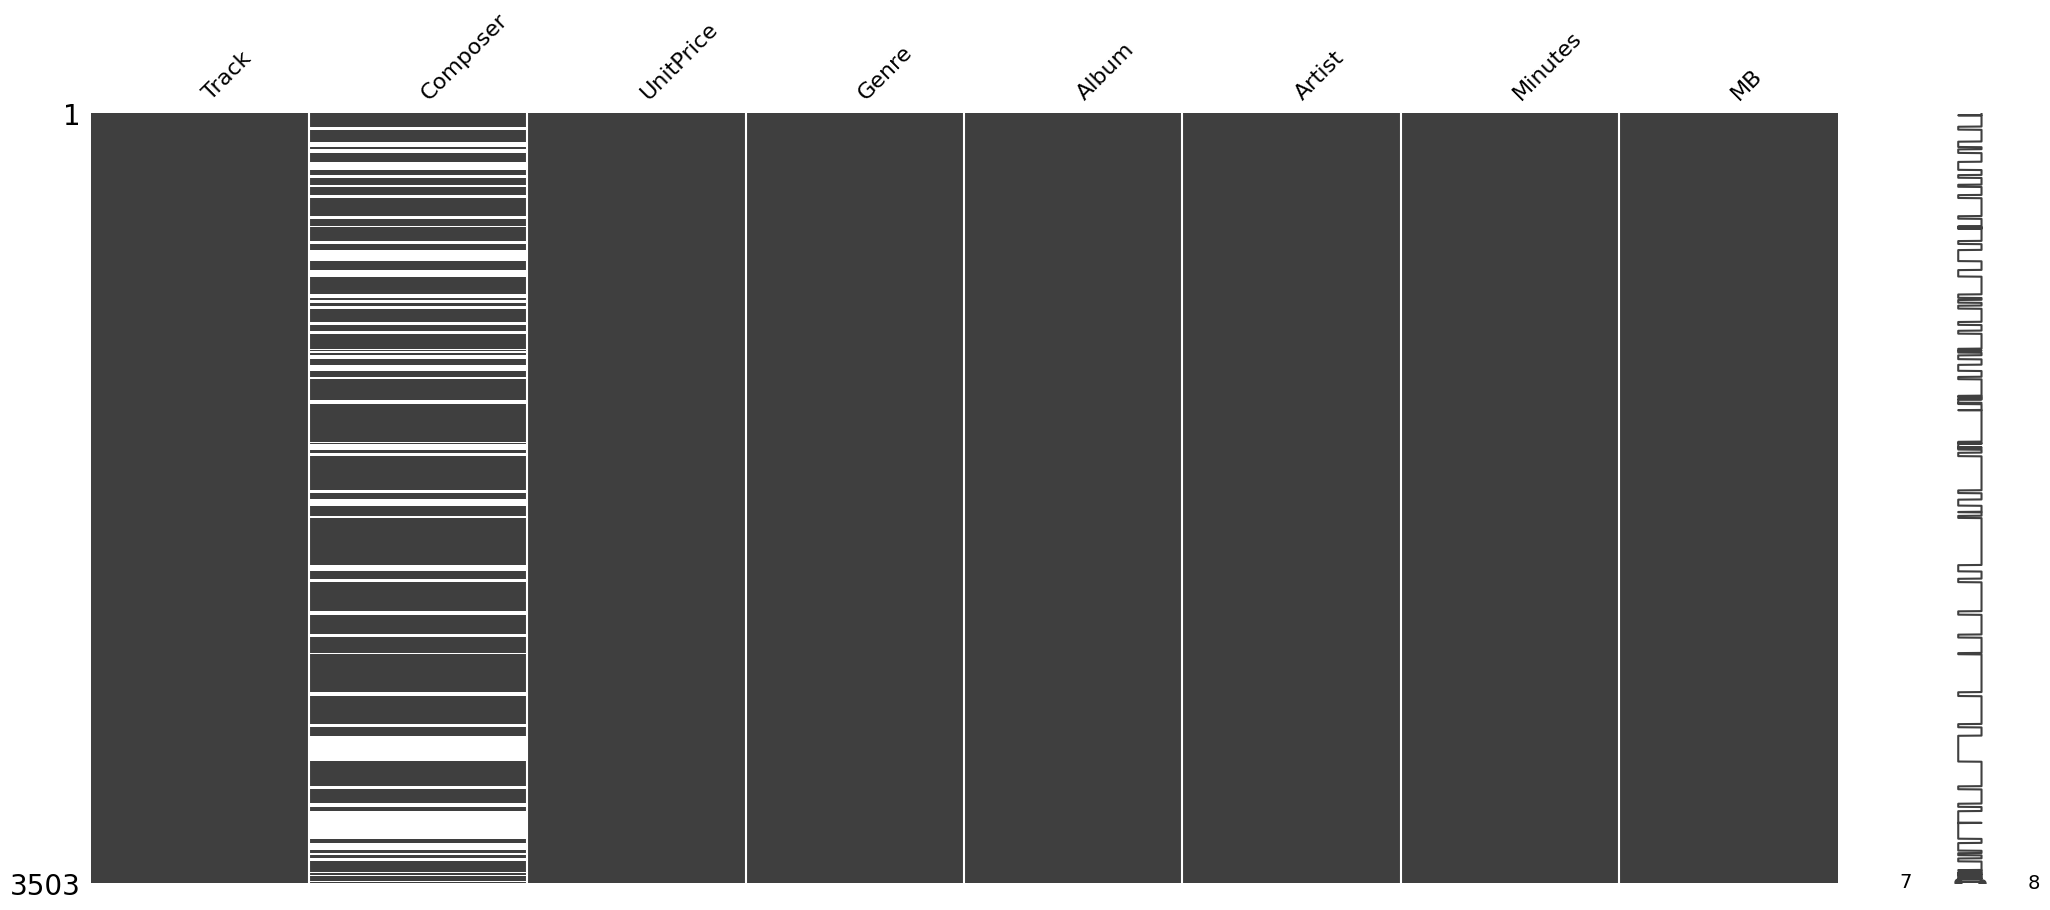

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("./data/itunes_data.csv")

df['Minutes'] = df['Milliseconds'] / (1000 * 60)
df['MB'] = df['Bytes'] / 1000000
df.drop(['Milliseconds', 'Bytes'], axis=1, inplace=True)

fig, axes = plt.subplots(nrows=1, ncols=2)
sns.boxplot(y=df['Minutes'],ax=axes[0])
sns.boxplot(y=df['Minutes'],ax=axes[1])
plt.yscale('log')
axes[0].set_title("Default Scale")
axes[1].set_title("Logarithmic Scale")

fig, axes = plt.subplots(nrows=1, ncols=2)
sns.boxenplot(y=df['Minutes'],ax=axes[0])
sns.boxenplot(y=df['Minutes'],ax=axes[1])
plt.yscale('log')
axes[0].set_title("Default Scale")
axes[1].set_title("Logarithmic Scale")

sns.histplot(x=df['Minutes'], kde=True)

sns.violinplot(data=df, x='Minutes')

top_5_genres = df['Genre'].value_counts().index[:5]
top_5_data = data=df[df['Genre'].isin(top_5_genres)]

sns.violinplot(data=top_5_data, x='Minutes', y='Genre')

sns.scatterplot(data=df, x='Minutes', y='MB' )

sns.scatterplot(data=top_5_data, x='Minutes', y='MB', hue='Genre')

sns.pairplot(data=df)

sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)



import missingno as msno
msno.matrix(df)

from pandas_profiling import ProfileReport
report = ProfileReport(df)



### Challenge 2: hous_pricing dataset 

Do the EDA and visualization procedures to explore the data/hous_pricing dataset.

Report the possible high correlation found from your visualization EDA.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  Age            4600 non-null   int64  
 15  Total_sqft     4600 non-null   int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 575.1+ KB
None
              price     bedroom

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 33.32it/s]


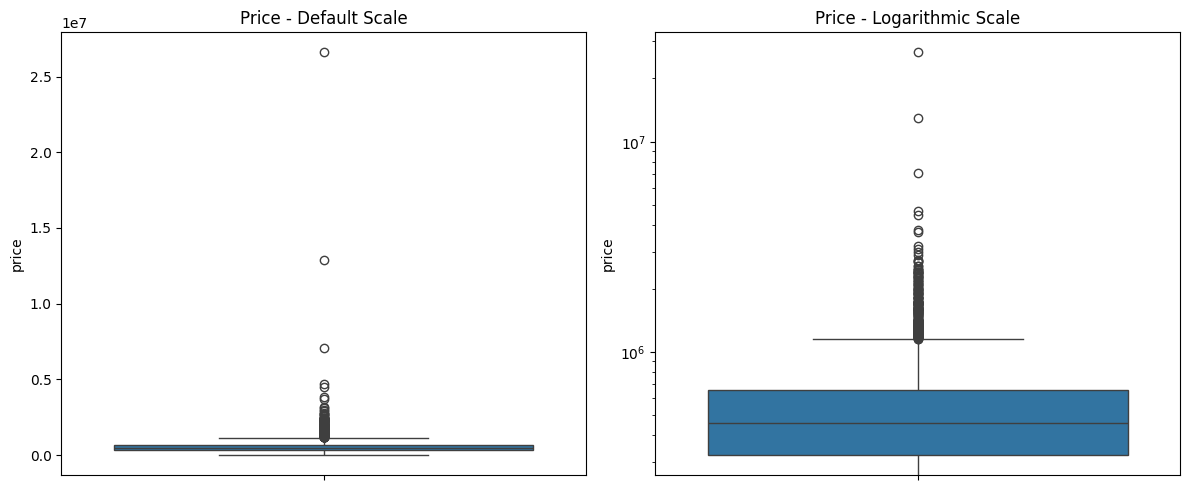

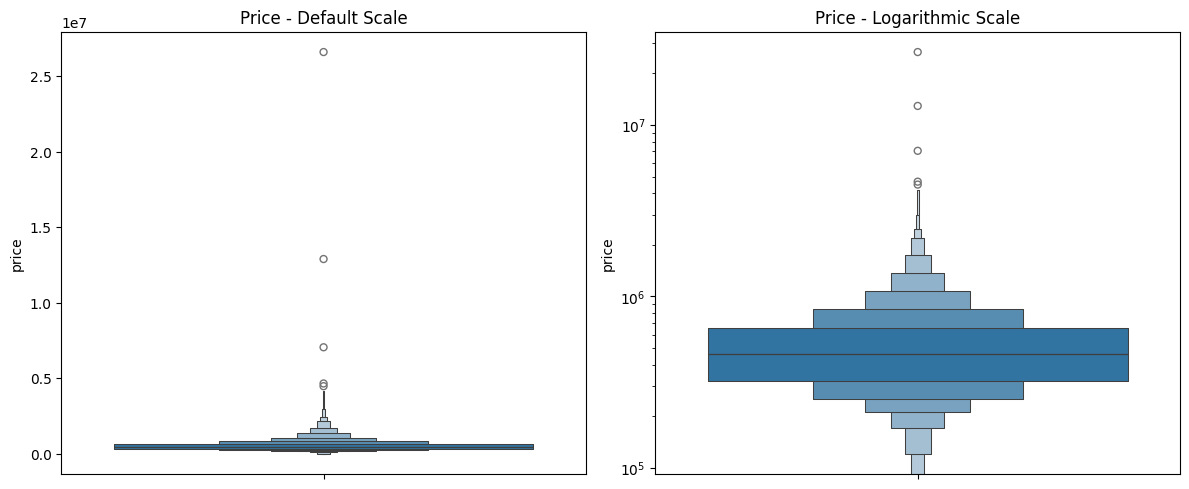

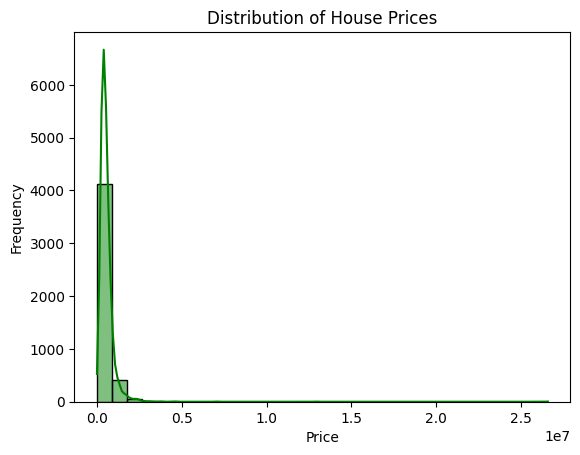

C:\Users\houss\AppData\Local\Temp\ipykernel_12672\3354288019.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='condition', y='price', palette='coolwarm')


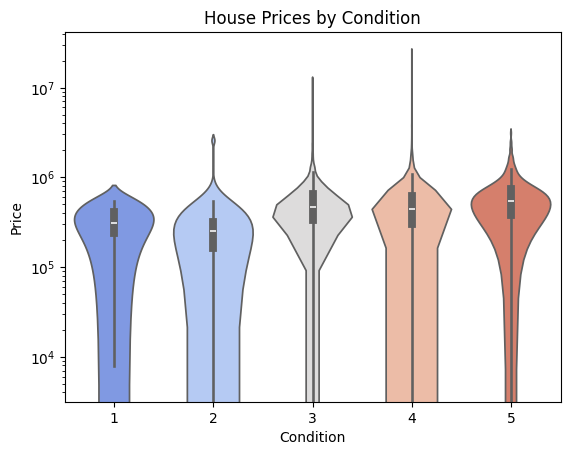

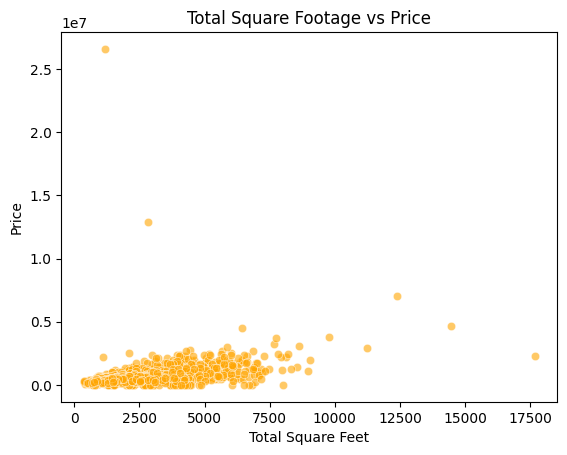

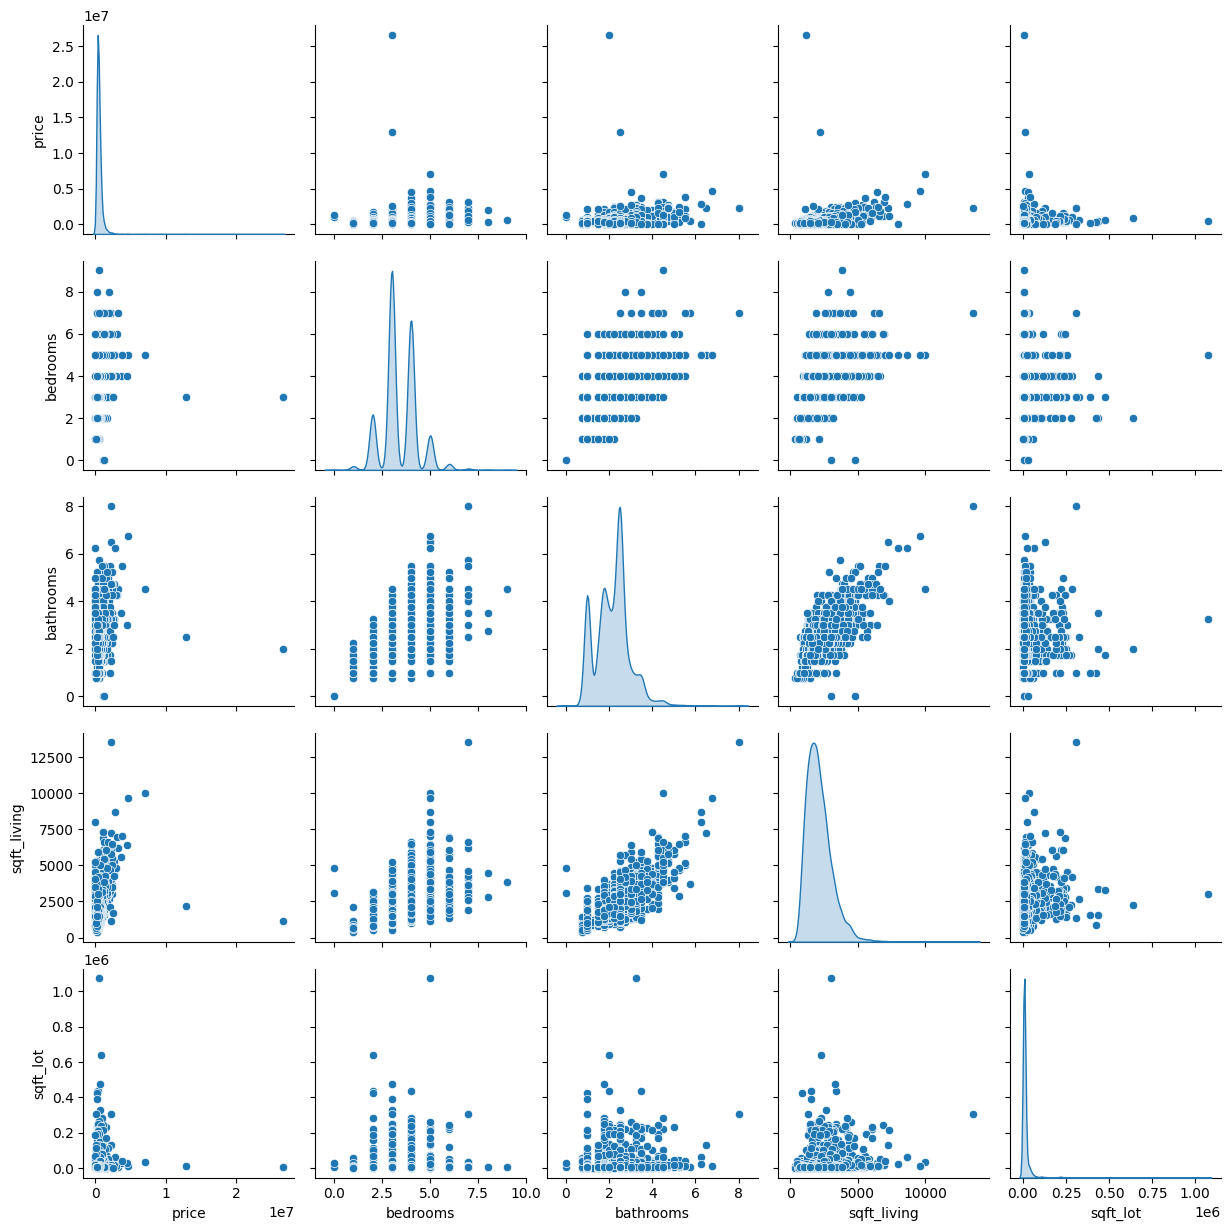

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 28.56it/s]


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from ydata_profiling import ProfileReport

# Load the data
df = pd.read_csv("./data/house_pricing.csv")

# Feature Engineering (if applicable)
df['Age'] = 2024 - df['yr_built']
df['Total_sqft'] = df['sqft_living'] + df['sqft_basement']
df.drop(['street', 'city', 'statezip', 'country'], axis=1, inplace=True)  # Dropping categorical address details

# Basic Data Exploration
print(df.info())
print(df.describe())

# Generate a profile report
profile = ProfileReport(df, title="House Pricing Data Report")
profile.to_file("house_pricing_report.html")

# Boxplots to detect outliers in numeric columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.boxplot(y=df['price'], ax=axes[0])
sns.boxplot(y=df['price'], ax=axes[1])
axes[0].set_title("Price - Default Scale")
axes[1].set_title("Price - Logarithmic Scale")
axes[1].set_yscale('log')
plt.tight_layout()
plt.show()

# Boxenplots for distribution analysis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
sns.boxenplot(y=df['price'], ax=axes[0])
sns.boxenplot(y=df['price'], ax=axes[1])
axes[1].set_yscale('log')
axes[0].set_title("Price - Default Scale")
axes[1].set_title("Price - Logarithmic Scale")
plt.tight_layout()
plt.show()

# Histogram of house prices
sns.histplot(x=df['price'], kde=True, bins=30, color='green')
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Violin Plot of Price by Condition
sns.violinplot(data=df, x='condition', y='price', palette='coolwarm')
plt.title("House Prices by Condition")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.yscale('log')
plt.show()

# Scatterplot: Total Square Footage vs Price
sns.scatterplot(data=df, x='Total_sqft', y='price', alpha=0.6, color='orange')
plt.title("Total Square Footage vs Price")
plt.xlabel("Total Square Feet")
plt.ylabel("Price")
plt.show()

# Pairplot for pairwise relationships
sns.pairplot(data=df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']], diag_kind='kde')
plt.show()

# # Heatmap of Correlations
# sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
# plt.title("Correlation Heatmap (Pearson)")
# plt.show()

# Spearman Correlation Heatmap
# sns.heatmap(df.corr(method='spearman'), annot=True, fmt=".2f", cmap='viridis')
# plt.title("Correlation Heatmap (Spearman)")
# plt.show()
# # Missing Data Visualization
# msno.matrix(df)
# plt.show()

# Automated Profiling Report
report = ProfileReport(df, title="House Pricing Data Profile")
report.to_file("house_pricing_report.html")
